**Loading the dataset through the dataset's API**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:17<00:00, 75.0MB/s]
100% 1.06G/1.06G [00:17<00:00, 63.6MB/s]


**Unzipping the zip File**


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip.extractall('/content')
zip.close()

**Importing all the dependancies**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Generators
training_data = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_data = keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalizing the data**

In [ ]:
def normalize(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

  training_data = training_data.map(normalize)
  validation_data = validation_data.map(normalize)

**Creating CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilation of Convolutional Neural Network(CNN)**

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

**Fitting the Model**

In [ ]:
memory = model.fit(training_data, epochs=10, batch_size=100, validation_data=validation_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 151ms/step - accuracy: 0.5969 - loss: 0.8083 - val_accuracy: 0.6280 - val_loss: 0.6430
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 163ms/step - accuracy: 0.7340 - loss: 0.5244 - val_accuracy: 0.6916 - val_loss: 0.6017
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 144ms/step - accuracy: 0.8075 - loss: 0.4127 - val_accuracy: 0.7250 - val_loss: 0.5635
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 149ms/step - accuracy: 0.8676 - loss: 0.3027 - val_accuracy: 0.7008 - val_loss: 0.7754
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 146ms/step - accuracy: 0.9149 - loss: 0.2105 - val_accuracy: 0.7474 - val_loss: 0.7399
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 149ms/step - accuracy: 0.9416 - loss: 0.1477 - val_accuracy: 0.7678 - val_loss: 0.7501
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 149ms/step - accuracy: 0.9679 - loss: 0.0840 - val_accuracy: 0.7344 - val_loss: 1.1086
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 149ms/step - accuracy: 0.9707 -

**CNN Model Accuracy**

In [ ]:
training_accuracy = memory.history['accuracy']
validation_accuracy = memory.history['val_accuracy']

final_training_accuracy = training_accuracy[-1]*100
final_validation_accuracy = validation_accuracy[-1]*100

print(f"Final training accuracy: {final_training_accuracy:.2f}%")
print(f"Final validation accuracy: {final_validation_accuracy:.2f}%")

Final training accuracy: 98.23%
Final validation accuracy: 80.00%


**Some Test Examples with images**


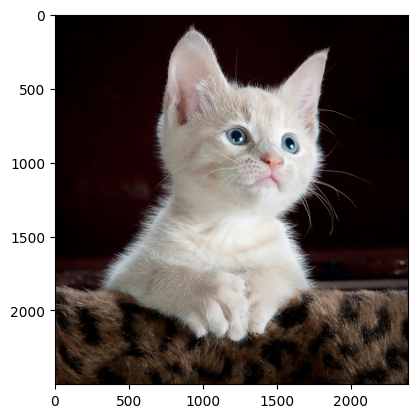

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image is of a Dog.


In [ ]:
test_img = cv2.imread('/content/Cat.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

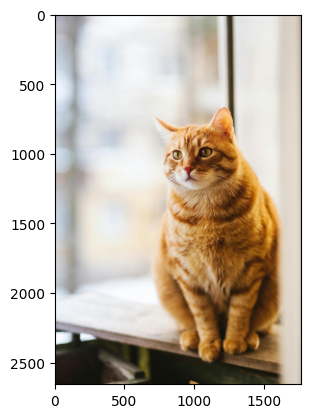

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/Cat1.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

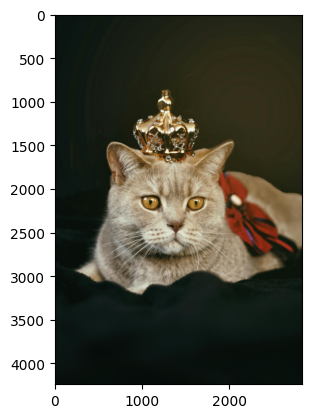

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.41141647]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/Cat2.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
model.predict(test_inp)

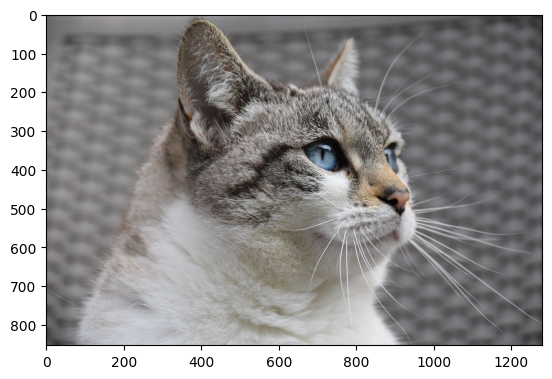

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.97108424]]
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/cat-8451431_1280.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

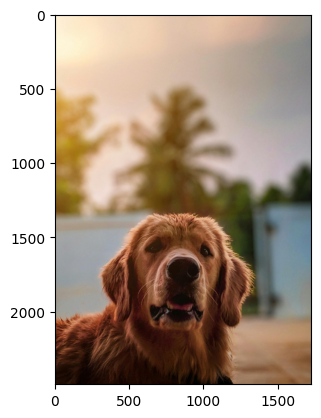

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.04119677]]
Image is of a Dog.


In [ ]:
test_img = cv2.imread('/content/pexels-mithulvarshan-2318990.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

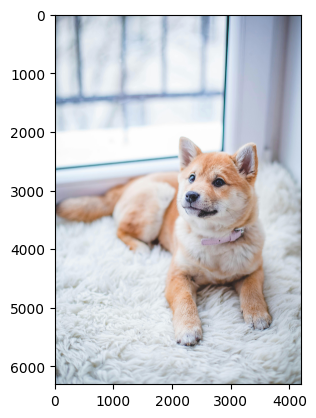

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.02459741]]
Image is of a Dog.


In [ ]:
test_img = cv2.imread('/content/Dog1.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

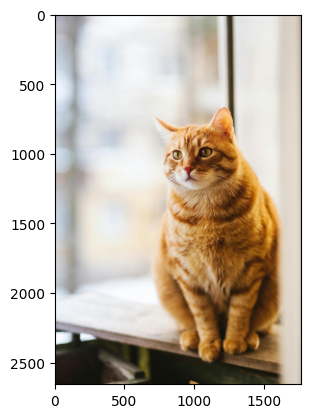

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.66446733]]
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/Cat1.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

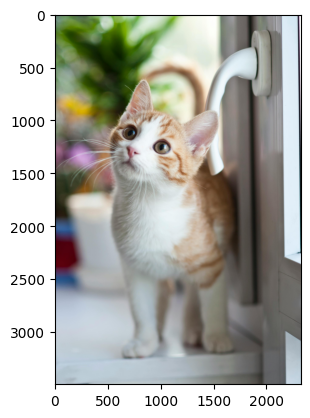

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.97848606]]
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/pexels-wojciech-kumpicki-1084687-2071873.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

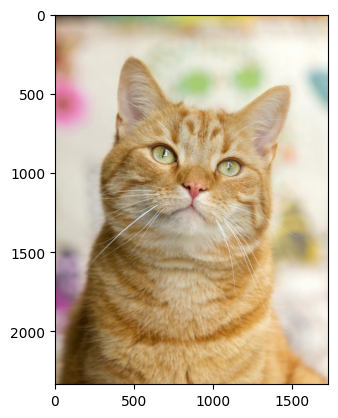

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5871082]]
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/pexels-monique-laats-230726-736532.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

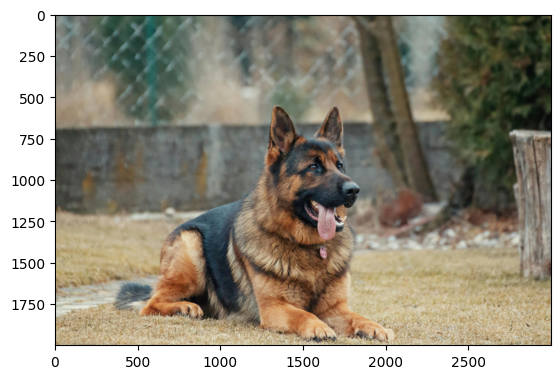

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.21070856]]
Image is of a Dog.


In [ ]:
test_img = cv2.imread('/content/pexels-summerstock-333083.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")

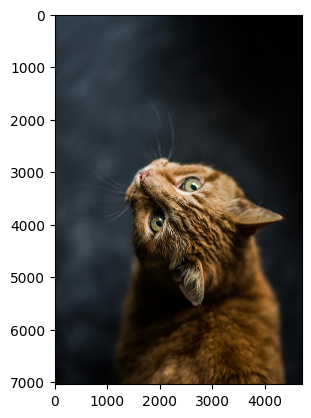

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.8297695]]
Image is of a Cat.


In [ ]:
test_img = cv2.imread('/content/pexels-alex-andrews-271121-821736.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))
result = model.predict(test_inp)
print(result)
if result < 0.5:
    print("Image is of a Dog.")
elif result > 0.5:
    print("Image is of a Cat.")